# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [197]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np

pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv("../data/hw2data.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,y
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,0.895260,1.374964,-1.332212,-1.968625,-0.660056,0.175819,0.498690,1.047972,0.284280,1.742669,-0.222606,-0.913079,-1.681218,-0.888971,0.242118,-0.888720,0.936742,1.412328,-2.369587,0.864052,-2.239604,0.401499,1.224871,0.064856,-1.279689,-0.585431,-0.261645,-0.182245,-0.202897,-0.109883,0.213480,-1.208574,-0.242020,1.518261,-0.384645,-0.443836,1.078197,-2.559185,1.181379,-0.631904,0.163929,0.096321,0.942468,-0.267595,-0.678026,1.297846,-2.364174,0.020334,-1.347925,-0.761573,2.011257,-0.044595,0.195070,-1.781563,-0.729045,0.196557,0.354758,0.616887,0.008628,0.527004,0.453782,-1.829740,0.037006,0.767902,0.589880,-0.363859,-0.805627,-1.118312,-0.131054,1.133080,-1.951804,-0.659892,-1.139802,0.784958,-0.554310,-0.470638,-0.216950,0.445393,-0.392389,-3.046143,0.543312,0.439043,-0.219541,-1.084037,0.351780,0.379236,-0.470033,-0.216731,-0.930157,-0.178589,-1.550429,0.417319,-0.944368,0.238103,-1.405963,-0.590058,-0.110489,-1.660700,0.115148,-0.379148,-1.742356,-1.303243,0.605120,0.895556,-0.131909,0.404762,0.223844,0.329623,1.285984,-1.506998,0.676461,-0.382009,-0.224259,-0.302250,-0.375147,-1.226196,0.183339,1.670943,-0.056133,-0.001385,-0.687299,-0.117475,0.466166,-0.370242,-0.453804,0.403265,-0.918005,0.252497,0.820322,1.359949,-0.090382,1.367597,1.034410,-0.996213,-1.217939,-0.304964,1.028935,-0.072287,-0.600658,1.552243,0.286904,-2.320594,0.317161,0.520041,0.225609,0.449712,-0.067276,-1.318396,-0.370704,-0.945616,-0.932741,-1.263068,0.452489,0.097896,-0.448165,-0.649338,-0.023423,1.079195,-2.004216,0.376877,-0.545712,-1.884586,-1.945703,-0.912783,0.219510,0.393063,-0.938982,1.017021,1.422983,0.396087,-0.591403,1.124419,0.755396,0.867407,-0.656464,-2.834555,2.116791,-1.610878,-0.035768,2.380745,0.330577,0.949246,-1.502397,-1.777667,-0.532703,1.090750,-0.346249,-0.794636,0.197967,1.081935,-1.444940,-1.210543,-0.788669,1.094638,0.234822,2.132153,0.936446,-0.035095,1.265078,0.211497,-0.704921,0.679975,-0.696327,-0.290397,1.327783,-0.101281,-0.803141,-0.464338,1.021791,-0.552541,-0.

b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [198]:
# Set y to be y variable and X to be the remaining features
data = df
y = df['y']
del data['y']
X = data


#Standardize the data for LASSO regularization
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)
X_scaled.std(axis=0)
X = pd.DataFrame(data = X_scaled)

# Split the data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

C:\Users\Lingting\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


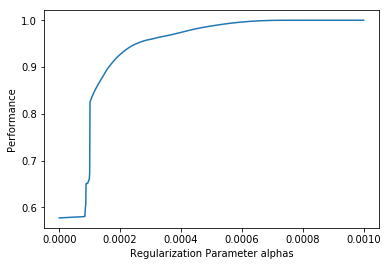

The regularization strength which optimizes the R2: 0.000861
Optimized R2 Performance Score: 0.999994


In [199]:
from sklearn.linear_model import Lasso
# Create linear regression object
alphas = np.logspace(-8,-3,1000)
scores = []

for alpha in alphas:
    regr = Lasso(alpha=alpha)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))

# Plot the figures
plt.plot(alphas,scores)
plt.xlabel('Regularization Parameter alphas')
plt.ylabel('Performance')
plt.show()

# Output the alphas for the with maximum score
print ('The regularization strength which optimizes the R2: %.6f' %alphas[scores.index(max(scores))])
print ('Optimized R2 Performance Score: %.6f' %scores[scores.index(max(scores))])

d) Plot the training perforamnce versus the testing performance, and observe where the test performance is
maximized. I've written an outline of the code you need.

C:\Users\Lingting\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


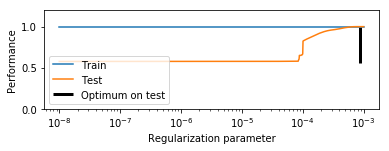

The regularization strength which optimizes the R2: 0.000861
Optimized R2 Performance Score: 0.999994


In [200]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(2, 1, 1)

# Initialize some np arrays
alphas = np.logspace(-8,-3,1000)
train_errors= np.zeros((len(alphas),1))
test_errors= np.zeros((len(alphas),1))

# Iterate through different alphas to calculate R^2
for i in range (0,len(alphas)):
    regr = Lasso(alpha=alphas[i])
    regr.fit(X_train, y_train)
    test_errors[i] =regr.score(X_test,y_test)
    train_errors[i] =regr.score(X_train,y_train)

# Plot the figure
alpha_optim= alphas[np.argmax(test_errors)]
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim,plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')
plt.show()

print ('The regularization strength which optimizes the R2: %.6f' %alpha_optim)
print ('Optimized R2 Performance Score: %.6f' % np.max(test_errors))

e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero?
Answer: The Lasso regression eliminate not important features by setting small coefficents or less important features to 0. In terms of geometric interpretation, Lasso can hit the corners of the constrained region, which implies that one or some of the coefficients is set to zero. 

C:\Users\Lingting\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


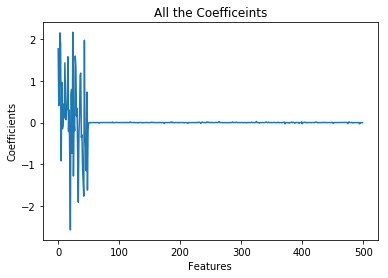

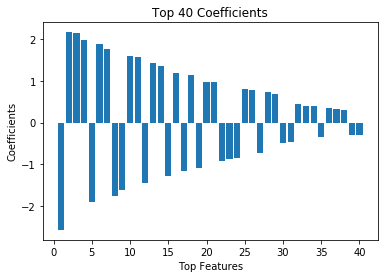

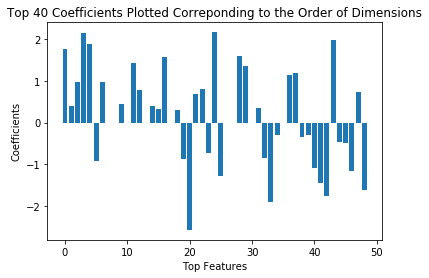

In [206]:
# Plot all the coefficients
regr = Lasso(alpha=alpha_optim)
regr.fit(X_train, y_train)
plt.plot(regr.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('All the Coefficeints')
plt.show()

# Plot sored top 40 coefficeints
absolute_errors = np.absolute(regr.coef_)
index = np.argsort(absolute_errors)[::-1]
index = np.asarray(index[0:40],dtype = int)
inter = range(40)+np.ones(40)
plt.bar(inter,regr.coef_[index])
plt.xlabel('Top Features')
plt.ylabel('Coefficients')
plt.title('Top 40 Coefficients')
plt.show()

# Plot Top 40 Coefficients Plotted Correponding to the Order of Dimensions
plt.bar(index,regr.coef_[index])
plt.xlabel('Top Features')
plt.ylabel('Coefficients')
plt.title('Top 40 Coefficients Plotted Correponding to the Order of Dimensions')
plt.show()



f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?
Anwser: Yes, it does work well on all random subset, since all R2 value are close to 1.

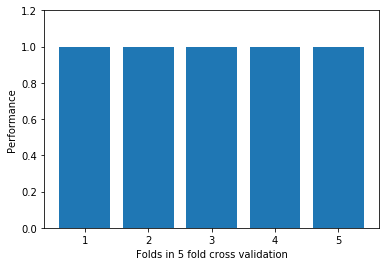

In [207]:
# Construct a kfolds object
from sklearn.cross_validation import KFold
kf = KFold(len(y),n_folds=5,shuffle=True)

# Initialize some matrix
X_matrix = X.as_matrix()
y_matrix = y.as_matrix()
scores = []

# Iterate through folds
for train_index, test_index in kf:
    X_train, X_test = X_matrix[train_index,:], X_matrix[test_index,:]
    y_train, y_test = y_matrix[train_index], y_matrix[test_index] 
    regr = Lasso(alpha=alpha_optim)
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
    
# Plot the figure
xaxis = range(5)+ np.ones(5)  
plt.bar(xaxis,scores)
plt.xlabel('Folds in 5 fold cross validation')
plt.ylabel('Performance')
plt.ylim([0, 1.2])
plt.show()   

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [208]:
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs



scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alpha_optim)

C:\Users\Lingting\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [209]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

Text(0,0.5,'Coef')

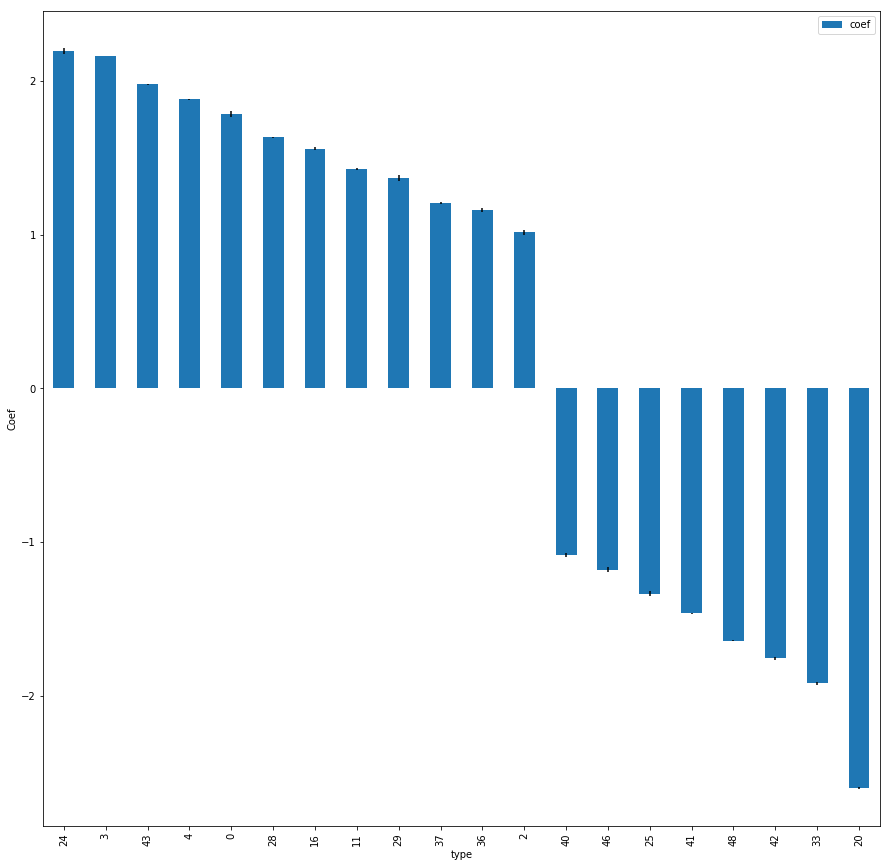

In [210]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))
plt.ylabel('Coef')